In [146]:
import numpy as np
import matplotlib.pyplot as plt


## Replicate binary mask generation from Repaint

In [147]:
class FLAG:
    def __init__(self):
        self.img_shape = [256, 256, 3]
        self.vertical_margin = 0
        self.horizontal_margin = 0
        self.height = 128
        self.width = 128
        self.max_delta_height= 32
        self.max_delta_width= 32

In [148]:
FLAGS = FLAG()

In [149]:
img_shape = FLAGS.img_shape
img_height = img_shape[0]
img_width = img_shape[1]
maxt = img_height - FLAGS.vertical_margin - FLAGS.height
maxl = img_width - FLAGS.horizontal_margin - FLAGS.width
t = int(np.random.uniform(size = [], low=FLAGS.vertical_margin, high=maxt).tolist())
l = int(np.random.uniform(size = [], low=FLAGS.horizontal_margin, high=maxl).tolist())
h = int(FLAGS.height)
w = int(FLAGS.width)

bbox = (t, l, h, w)
bbox

(4, 40, 128, 128)

In [150]:
FLAGS.vertical_margin, maxt, maxl

(0, 128, 128)

In [151]:
[1] + [h,w] + [1], bbox

([1, 128, 128, 1], (4, 40, 128, 128))

In [152]:
mask = np.zeros((1, h, w, 1), np.float32)
h2 = np.random.randint(FLAGS.max_delta_height//2+1)
w2 = np.random.randint(FLAGS.max_delta_width//2+1)
mask[:, bbox[0]+h2:bbox[0]+bbox[2]-h2,          # 128 + 5 : 128 - 5 
        bbox[1]+w2:bbox[1]+bbox[3]-w2, :] = 1.  # 128 + 5 : 128 - 5
# mask

In [153]:
img_shape = FLAGS.img_shape
img_height = img_shape[0]
img_width = img_shape[1]
maxt = img_height - FLAGS.vertical_margin - FLAGS.height
maxl = img_width - FLAGS.horizontal_margin - FLAGS.width
t = int(np.random.uniform(size = [], low=FLAGS.vertical_margin, high=maxt).tolist())
l = int(np.random.uniform(size = [], low=FLAGS.horizontal_margin, high=maxl).tolist())
h = int(FLAGS.height)
w = int(FLAGS.width)
bbox = (t, l, h, w)
bbox

(49, 113, 128, 128)

(3, 7)

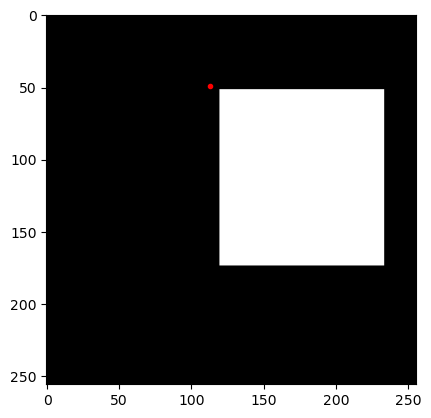

In [163]:
mask = np.zeros((1, img_height, img_width, 1), np.float32)
h2 = np.random.randint(FLAGS.max_delta_height//2+1)
w2 = np.random.randint(FLAGS.max_delta_width//2+1)
mask[:, bbox[0]+h2:bbox[0]+bbox[2]-h2,          # T + 5 : T + 128 - 5 
        bbox[1]+w2:bbox[1]+bbox[3]-w2, :] = 1.  # L + 5 : L + 128 - 5
mask.reshape([1] + [img_height,img_width] + [1])
plt.imshow(np.reshape(mask, img_shape[:2]), 'gray');
plt.plot(bbox[1],bbox[0], marker = '.', c = 'red');
h2, w2

In [1]:
dummy = (5, 6, 7, 8, 9)
b, *_ = dummy
b

5

## Guided Diffusion from SR3
replicating results

In [116]:
# Inpainting/Palette-Image-to-Image-Diffusion-Models/models/guided_diffusion_modules/unet.py
import os
os.chdir('/mnt/c/Users/ankit/Desktop/Msc AIML/msc-project/Inpainting/Palette-Image-to-Image-Diffusion-Models')

In [131]:
from models.guided_diffusion_modules.unet import UNet # type: ignore
import torch
import numpy as np
from models.guided_diffusion_modules import unet # type: ignore
import matplotlib.pyplot as plt

In [18]:
b, c, h, w = 3, 6, 64, 64
timsteps = 100
model = UNet(
    image_size=h,
    in_channel=c,
    inner_channel=64,
    out_channel=3,
    res_blocks=2,
    attn_res=[8]
)
x = torch.randn((b, c, h, w))
emb = torch.ones((b, ))
out = model(x, emb)

In [20]:
out.shape

torch.Size([3, 3, 64, 64])

In [21]:
x.shape

torch.Size([3, 6, 64, 64])

In [24]:
emb, emb.shape

(tensor([1., 1., 1.]), torch.Size([3]))

In [27]:
model.cond_embed

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): SiLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
)

In [45]:
'''
EmbedSequential: implemets EmbedBlock Sequentially while checking for x AND emb
EmbedBlock: forward fn implemented to take x and emb as input

SiLU: x * torch.sigmoid(x) acts as a gate (?)

QKVAttentionLegacy: attention at the end of downsampling
'''
model.input_blocks


ModuleList(
  (0): EmbedSequential(
    (0): Conv2d(6, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (1-2): 2 x EmbedSequential(
    (0): ResBlock(
      (in_layers): Sequential(
        (0): GroupNorm32(32, 64, eps=1e-05, affine=True)
        (1): SiLU()
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (h_upd): Identity()
      (x_upd): Identity()
      (emb_layers): Sequential(
        (0): SiLU()
        (1): Linear(in_features=256, out_features=128, bias=True)
      )
      (out_layers): Sequential(
        (0): GroupNorm32(32, 64, eps=1e-05, affine=True)
        (1): SiLU()
        (2): Dropout(p=0, inplace=False)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (skip_connection): Identity()
    )
  )
  (3): EmbedSequential(
    (0): ResBlock(
      (in_layers): Sequential(
        (0): GroupNorm32(32, 64, eps=1e-05, affine=True)
        (1): SiLU()
        (2): Conv2d(64, 64, ke

In [46]:
'''
'''
model.middle_block

EmbedSequential(
  (0): ResBlock(
    (in_layers): Sequential(
      (0): GroupNorm32(32, 512, eps=1e-05, affine=True)
      (1): SiLU()
      (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (h_upd): Identity()
    (x_upd): Identity()
    (emb_layers): Sequential(
      (0): SiLU()
      (1): Linear(in_features=256, out_features=1024, bias=True)
    )
    (out_layers): Sequential(
      (0): GroupNorm32(32, 512, eps=1e-05, affine=True)
      (1): SiLU()
      (2): Dropout(p=0, inplace=False)
      (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (skip_connection): Identity()
  )
  (1): AttentionBlock(
    (norm): GroupNorm32(32, 512, eps=1e-05, affine=True)
    (qkv): Conv1d(512, 1536, kernel_size=(1,), stride=(1,))
    (attention): QKVAttentionLegacy()
    (proj_out): Conv1d(512, 512, kernel_size=(1,), stride=(1,))
  )
  (2): ResBlock(
    (in_layers): Sequential(
      (0): GroupNorm32(32, 512, eps=1e-05, affine=Tru

In [47]:
''' 
'''
model.output_blocks

ModuleList(
  (0-1): 2 x EmbedSequential(
    (0): ResBlock(
      (in_layers): Sequential(
        (0): GroupNorm32(32, 1024, eps=1e-05, affine=True)
        (1): SiLU()
        (2): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (h_upd): Identity()
      (x_upd): Identity()
      (emb_layers): Sequential(
        (0): SiLU()
        (1): Linear(in_features=256, out_features=1024, bias=True)
      )
      (out_layers): Sequential(
        (0): GroupNorm32(32, 512, eps=1e-05, affine=True)
        (1): SiLU()
        (2): Dropout(p=0, inplace=False)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (skip_connection): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): AttentionBlock(
      (norm): GroupNorm32(32, 512, eps=1e-05, affine=True)
      (qkv): Conv1d(512, 1536, kernel_size=(1,), stride=(1,))
      (attention): QKVAttentionLegacy()
      (proj_out): Conv1d(512, 512, kernel_size=(1,

In [54]:
emb.view(-1,), model.inner_channel

(tensor([1., 1., 1.]), 64)

In [57]:
unet.gamma_embedding(emb.view(-1,), model.inner_channel).shape

torch.Size([3, 64])

In [103]:
resblock = unet.ResBlock(64, 1, 0.9), print(unet.ResBlock.__doc__)


    A residual block that can optionally change the number of channels.
    :param channels: the number of input channels.
    :param emb_channels: the number of embedding channels.
    :param dropout: the rate of dropout.
    :param out_channel: if specified, the number of out channels.
    :param use_conv: if True and out_channel is specified, use a spatial
        convolution instead of a smaller 1x1 convolution to change the
        channels in the skip connection.
    :param use_checkpoint: if True, use gradient checkpointing on this module.
    :param up: if True, use this block for upsampling.
    :param down: if True, use this block for downsampling.
    


* SR3 - guided diffusion implemets the conditioning of the class by using the class labels as the arguments for the positional encoding
* Next check how does Palette implements the image conditioning

In [120]:
from data.util.mask import random_bbox, bbox2mask # type : ignore

In [128]:
random_bbox()

(42, 89, 116, 116)

In [130]:
bbox2mask((256, 256), random_bbox()).shape

(256, 256, 1)

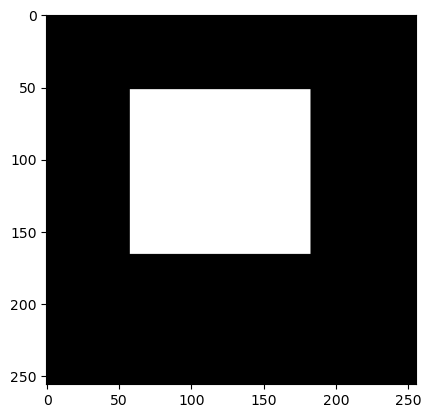

In [242]:
mask = torch.from_numpy(bbox2mask((256, 256), random_bbox())).permute(2,0,1)
plt.imshow(mask[0], 'gray')

### Palette implemets Repaints bbox

onto image conditioning

In [259]:
from tifffile import imread, imsave

data_high_res= imread('/mnt/c/Users/ankit/Desktop/Msc AIML/Data/convallaria/testDataGT.tif') 
img = data_high_res[0]

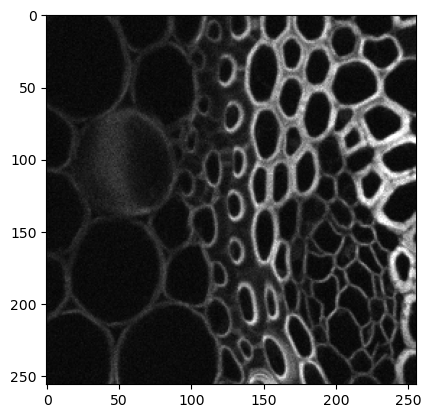

In [265]:
img = img/img.sum()
vmax = np.percentile(img, 99.9)
plt.imshow(img, vmin = 0, vmax = vmax, cmap ='gray')

In [261]:
from torchvision import transforms
img = torch.from_numpy(img)
crop = transforms.RandomCrop((256, 256))
img = crop(img).to(torch.float)
img.shape

torch.Size([256, 256])

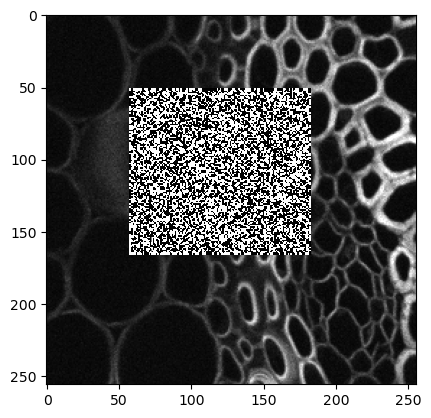

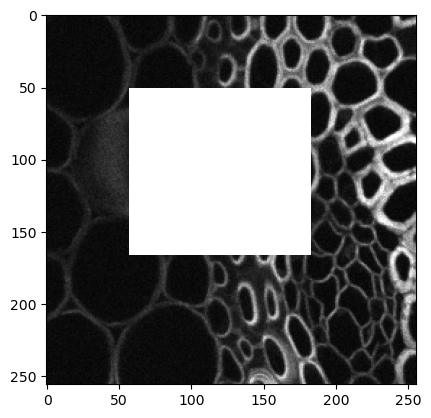

In [264]:
cond_image = img*(1. - mask) + mask*torch.randn_like(img)
mask_img = img*(1. - mask) + mask

plt.figure()
plt.imshow(cond_image[0], vmin = 0, vmax = vmax, cmap = 'gray')
plt.figure()
plt.imshow(mask_img[0], vmin = 0, vmax = vmax, cmap = 'gray')